In [3]:
import pandas as pd
from sklearn.metrics import classification_report, mean_squared_error,confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, auc,roc_curve
!pip install tld
from tld import get_tld, is_tld
from sklearn.model_selection import train_test_split
import random
import math
from collections import Counter
import time
from bs4 import BeautifulSoup
import urllib
from urllib.parse import urlparse, parse_qs
!pip install datasets
from datasets import load_dataset
from datasets import Dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt
from collections import Counter
import re
from urllib.parse import urlparse
import warnings
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
warnings.filterwarnings('ignore')
file_path = "url.csv"
df = pd.read_csv(file_path)
print(df.shape)
print(df.info())

(90731, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90731 entries, 0 to 90730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     90731 non-null  object
 1   type    90730 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB
None


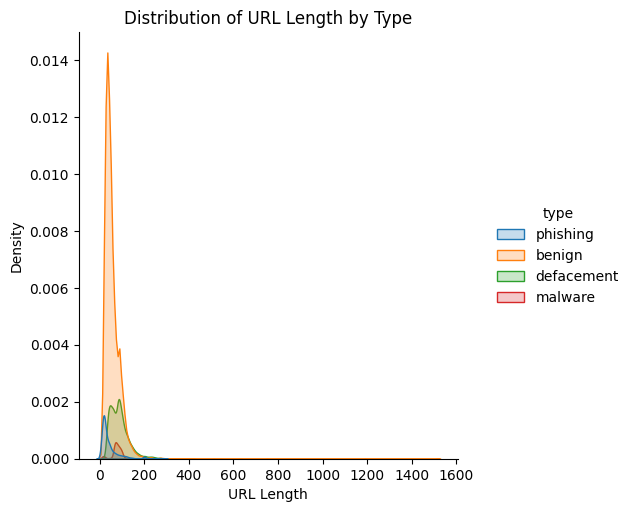

In [4]:
df['url_len'] = [len(url) for url in df.url]#adding column for len of the url
# Plot distribution of 'url_len' for each 'type'
sns.displot(df, x='url_len', hue='type', kind='kde', fill=True)
# Add labels and title
plt.xlabel('URL Length')
plt.ylabel('Density')
plt.title('Distribution of URL Length by Type')
plt.show()

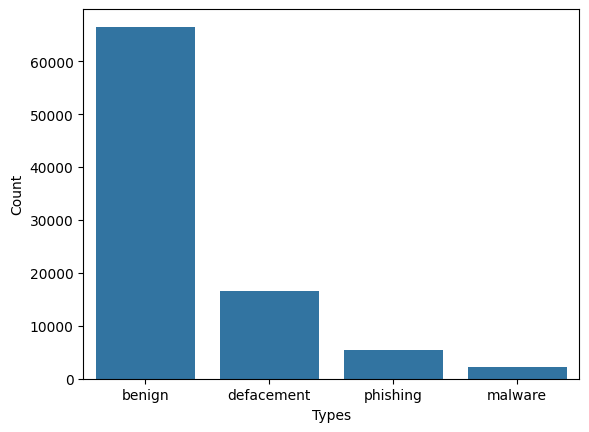

In [5]:
count = df.type.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [6]:
df['url'] = df['url'].replace('www.', '', regex=True)

In [7]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
df['Category'] = df['type']
df = df.replace(rem)

In [8]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain
df['domain'] = df['url'].apply(lambda i: process_tld(i))
print(df.head)

<bound method NDFrame.head of                                                      url        type  url_len  \
0                                       br-icloud.com.br    phishing       16   
1                    mp3raid.com/music/krizz_kaliko.html      benign       35   
2                        bopsecrets.org/rexroth/cr/1.htm      benign       31   
3      http://garage-pirenne.be/index.php?option=com_...  defacement       88   
4      http://adventure-nicaragua.net/index.php?optio...  defacement      235   
...                                                  ...         ...      ...   
90726                     myspace.com/thekingkhanbbqshow      benign       30   
90727  tokyohive.com/2010/12/kat-tun-electrifies-at-t...      benign       66   
90728  ca.linkedin.com/pub/mois%C3%A9s-p%C3%A9rez-dor...      benign       61   
90729  http://geothermalanywhere.com/en/news/78-geoth...  defacement      133   
90730  http://emgn.com/entertainment/a-guy-noticed-so...         NaN       99  

In [9]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    df[a] = df['url'].apply(lambda i: i.count(a))
print(df.head)

<bound method NDFrame.head of                                                      url        type  url_len  \
0                                       br-icloud.com.br    phishing       16   
1                    mp3raid.com/music/krizz_kaliko.html      benign       35   
2                        bopsecrets.org/rexroth/cr/1.htm      benign       31   
3      http://garage-pirenne.be/index.php?option=com_...  defacement       88   
4      http://adventure-nicaragua.net/index.php?optio...  defacement      235   
...                                                  ...         ...      ...   
90726                     myspace.com/thekingkhanbbqshow      benign       30   
90727  tokyohive.com/2010/12/kat-tun-electrifies-at-t...      benign       66   
90728  ca.linkedin.com/pub/mois%C3%A9s-p%C3%A9rez-dor...      benign       61   
90729  http://geothermalanywhere.com/en/news/78-geoth...  defacement      133   
90730  http://emgn.com/entertainment/a-guy-noticed-so...         NaN       99  

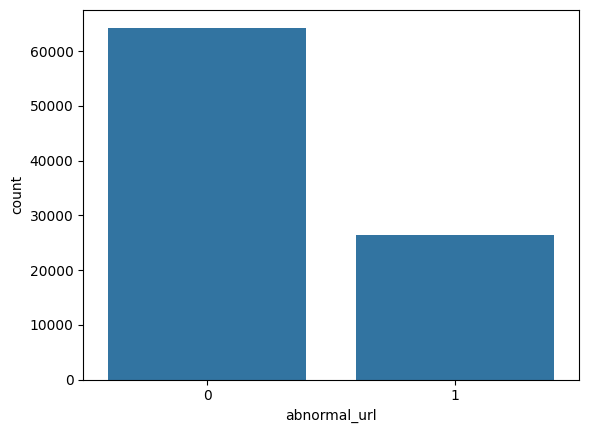

In [10]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
sns.countplot(x='abnormal_url', data=df);
plt.show()

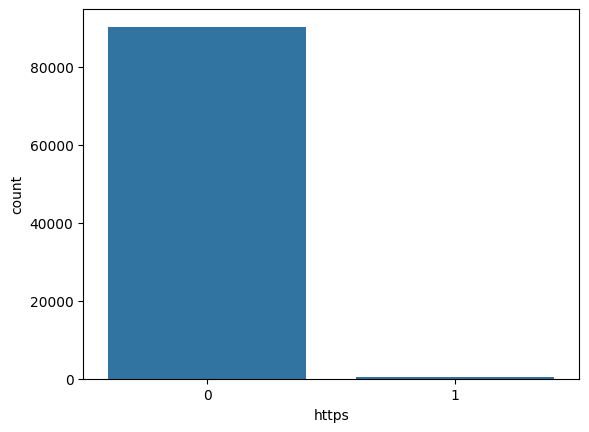

In [11]:
def httpSecure(url):
    https = urlparse(url).scheme
    match = str(https)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['https'] = df['url'].apply(lambda i: httpSecure(i))
sns.countplot(x='https', data=df);

In [12]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['digits']= df['url'].apply(lambda i: digit_count(i))

In [13]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['letters']= df['url'].apply(lambda i: letter_count(i))

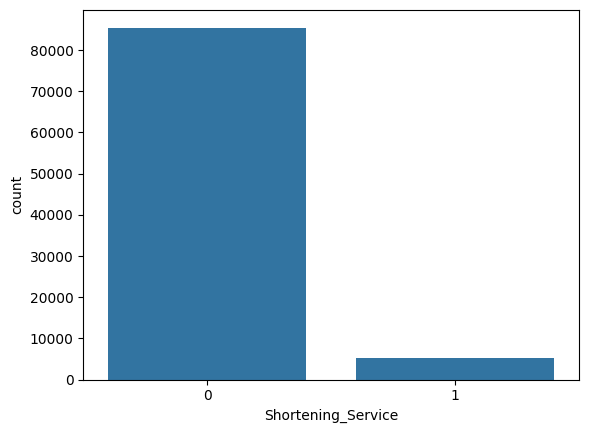

In [14]:
def Shortening_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['Shortening_Service'] = df['url'].apply(lambda x: Shortening_Service(x))
sns.countplot(x='Shortening_Service', data=df);

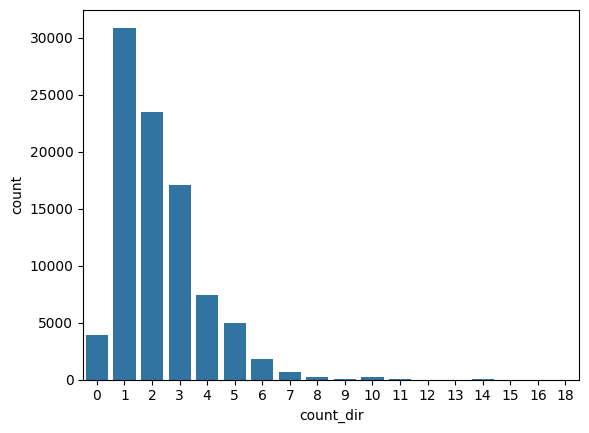

In [15]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
sns.countplot(x='count_dir', data=df);

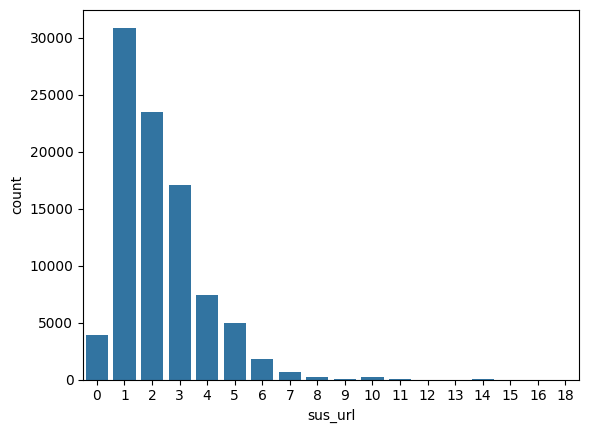

In [16]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: no_of_dir(i))
sns.countplot(x='sus_url', data=df);

In [17]:
#Hostname Length
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))
print(df.shape)

(90731, 26)


In [18]:
# Move 'Category' column to the last position
df = df[[col for col in df.columns if col != 'Category'] + ['Category']]

# Verify the column order
print(df.columns)


Index(['url', 'type', 'url_len', 'domain', '@', '?', '-', '=', '.', '#', '%',
       '+', '$', '!', '*', ',', '//', 'abnormal_url', 'https', 'digits',
       'letters', 'Shortening_Service', 'count_dir', 'sus_url',
       'hostname_length', 'Category'],
      dtype='object')


In [19]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Drop non-numeric columns like 'url' and 'type' and use the remaining features for training


X = df.drop(columns=['url', 'type', 'Category','domain'])  # Drop 'url' and 'type' columns
y = df['Category']  # Target column (Category) to predict


# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)  # Features (float32 for NN)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)  # Features (float32 for NN)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Labels (long type for classification)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)  # Labels (long type for classification)

# Verify tensor shapes and types
print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_train_tensor.dtype)  # Should be torch.float32
print(y_train_tensor.dtype)  # Should be torch.long


torch.Size([72584, 22])
torch.Size([72584])
torch.float32
torch.int64


In [20]:
print(torch.min(y_train_tensor), torch.max(y_train_tensor))
print(torch.unique(y_train_tensor))
# Example: Ensure labels are within the correct range (0 to 3 for 4 classes)
y_train_tensor = torch.clamp(y_train_tensor, min=0, max=3)
y_test_tensor = torch.clamp(y_test_tensor, min=0, max=3)
print(torch.min(y_train_tensor), torch.max(y_train_tensor))
print(torch.unique(y_train_tensor))

tensor(0) tensor(3)
tensor([0, 1, 2, 3])
tensor(0) tensor(3)
tensor([0, 1, 2, 3])


Epoch [5/25], Train Loss: 0.1495, Train Accuracy: 0.9491, Val Loss: 0.1136, Val Accuracy: 0.9578
Epoch [10/25], Train Loss: 0.1346, Train Accuracy: 0.9543, Val Loss: 0.0985, Val Accuracy: 0.9641
Epoch [15/25], Train Loss: 0.1296, Train Accuracy: 0.9570, Val Loss: 0.0918, Val Accuracy: 0.9682
Epoch [20/25], Train Loss: 0.1240, Train Accuracy: 0.9580, Val Loss: 0.0877, Val Accuracy: 0.9697
Epoch [25/25], Train Loss: 0.1190, Train Accuracy: 0.9595, Val Loss: 0.0882, Val Accuracy: 0.9686
Final Test Set Metrics: Accuracy: 0.9686, Precision: 0.9680, Recall: 0.9686, F1 Score: 0.9674


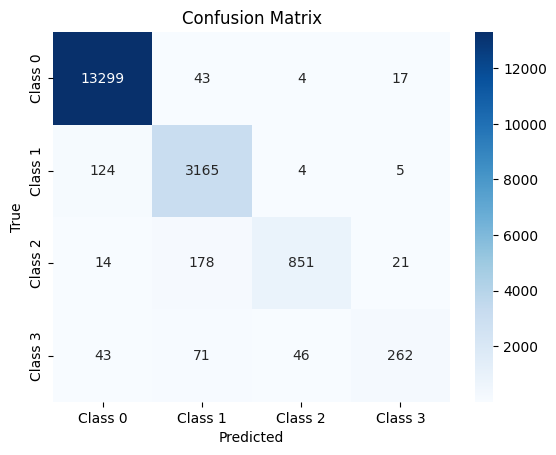

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class AdvancedNNModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(AdvancedNNModel, self).__init__()

        self.fc1 = nn.Linear(input_dim, 128)   # First layer (increase the size for more capacity)
        self.bn1 = nn.BatchNorm1d(128)         # Batch Normalization
        self.dropout1 = nn.Dropout(0.4)        # Dropout regularization

        self.fc2 = nn.Linear(128, 256)         # Second layer (larger hidden layer)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.4)

        self.fc3 = nn.Linear(256, 256)         # Third layer (reduced again for better capacity control)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.4)

        self.fc4 = nn.Linear(256, output_dim)  # Output layer for 4 classes


    def forward(self, x):
        # Pass through the layers with batch normalization, ReLU activations, and dropout

        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)


        x = self.fc4(x)  # No activation for logits in multi-class classification
        return x

# Step 3: Instantiate Model
input_dim = X_train_tensor.shape[1]  # 22 features
output_dim = 4  # For 4 classes (multiclass classification)
model = AdvancedNNModel(input_dim, output_dim)

# Step 4: Define Loss Function and Optimizer
loss_fn = nn.CrossEntropyLoss()  # Cross-Entropy Loss for multiclass classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Adam optimizer with weight decay (L2 regularization)

# Step 5: Define Learning Rate Scheduler (to adjust the learning rate during training)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

# Step 6: DataLoader (for batch processing)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 7: Train the Model
epochs = 25
train_losses = []
best_val_loss = float('inf')
patience = 10
patience_counter = 0

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)  # Get the predicted class
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)

    # Validation step
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_loss = val_loss / len(test_loader.dataset)
    val_accuracy = val_correct / val_total

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Print metrics every 10 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")



# Step 8: Final Evaluation on Test Set
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)  # Get predicted classes

accuracy = accuracy_score(y_test_tensor.numpy(), y_pred.numpy())
precision = precision_score(y_test_tensor.numpy(), y_pred.numpy(), average='weighted')  # Use weighted for multiclass
recall = recall_score(y_test_tensor.numpy(), y_pred.numpy(), average='weighted')
f1 = f1_score(y_test_tensor.numpy(), y_pred.numpy(), average='weighted')

print(f"Final Test Set Metrics: "
      f"Accuracy: {accuracy:.4f}, "
      f"Precision: {precision:.4f}, "
      f"Recall: {recall:.4f}, "
      f"F1 Score: {f1:.4f}")

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test_tensor.numpy(), y_pred.numpy())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
